MOS (Mean Opinion Score) is a numerical measure of the overall quality of an experience as perceived by users. It's the gold standard for measuring user satisfaction in networking.
MOS Scale:
1.0 = Bad (Unusable, very annoying)
2.0 = Poor (Annoying, but usable with effort)
3.0 = Fair (Slightly annoying, acceptable)
4.0 = Good (Perceptible but not annoying)
5.0 = Excellent (Imperceptible, perfect quality)
Real-World Examples:
MOS 5.0: 4K Netflix with no buffering, crystal clear Zoom call
MOS 4.0: 1080p streaming with occasional buffer, good video call quality
MOS 3.0: 720p with some buffering, video call with minor glitches
MOS 2.0: Frequent buffering, choppy video calls but still usable
MOS 1.0: Constant buffering, dropped calls, unusable experience

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('perfectly_balanced_wifi_dataset.csv')

In [45]:
df.head()

,timestamp,hour_of_day,day_of_week,is_weekend,is_business_hours,is_peak_hours,is_wfh_core_hours,device_name,device_group,device_max_bandwidth,...,packet_loss,signal_strength,ping_test_status,historical_avg_bitrate,data_usage,quality_satisfaction,throughput,throughput_efficiency,optimal_bandwidth_allocation,MOS
0,2025-05-25 21:29:49.763223,12,1,False,True,False,True,Work Laptop,work_computer,79.289098,...,0.274608,0.676556,Fair,12.480591,0.255445,0.842030,9.477363,0.690951,13.716411,4.382785
1,2025-05-22 23:44:49.763353,10,1,False,True,False,True,Work Laptop,work_computer,25.879548,...,0.135022,0.633511,Fair,5.622185,0.077280,0.742534,3.960396,0.680897,5.816435,4.075948
2,2025-05-05 20:25:49.763401,13,0,False,True,False,True,Work Laptop,work_computer,60.427702,...,0.047487,0.479903,Fair,4.708188,0.093967,0.720076,2.602810,0.590906,4.404778,3.755764
3,2025-05-26 22:11:49.763441,12,2,False,True,False,True,Business Desktop,work_computer,74.183193,...,0.259046,0.287324,Fair,7.361602,0.143142,0.744342,3.537237,0.524914,6.738703,3.915175
4,2025-05-06 20:47:49.763478,13,0,False,True,False,True,Work Laptop,work_computer,145.118148,...,2.078673,0.421259,Fair,3.594254,0.050128,0.450361,2.065831,0.574285,3.597224,2.813726


In [46]:
df.tail()

,timestamp,hour_of_day,day_of_week,is_weekend,is_business_hours,is_peak_hours,is_wfh_core_hours,device_name,device_group,device_max_bandwidth,...,packet_loss,signal_strength,ping_test_status,historical_avg_bitrate,data_usage,quality_satisfaction,throughput,throughput_efficiency,optimal_bandwidth_allocation,MOS
49995,2025-05-25 01:45:50.940015,8,1,False,False,False,False,Smart Speaker,smart_home,2.786180,...,0.717542,0.401902,Fair,0.280342,0.007430,0.711512,0.165843,0.629098,0.263621,3.845083
49996,2025-05-29 08:03:50.940037,2,3,False,False,False,False,Security Camera,smart_home,7.490253,...,0.038449,0.798330,Good,5.617184,0.171995,0.912159,4.920235,0.821106,5.992202,4.692406
49997,2025-05-10 02:30:50.940059,7,4,False,False,False,False,Smart Speaker,smart_home,2.895001,...,0.099673,0.458386,Fair,1.514209,0.028102,0.914584,1.038214,0.686690,1.511911,4.712693
49998,2025-05-03 08:49:50.940081,1,0,False,False,False,False,IoT Device,smart_home,1.112323,...,0.165629,0.411402,Fair,0.366627,0.007904,0.710692,0.226895,0.654233,0.346811,3.708053
49999,2025-05-14 07:03:50.940103,3,3,False,False,False,False,Security Camera,smart_home,9.700670,...,0.116735,0.878439,Good,2.724869,0.070114,0.786226,2.589383,0.831600,3.113738,4.066394


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     50000 non-null  object 
 1   hour_of_day                   50000 non-null  int64  
 2   day_of_week                   50000 non-null  int64  
 3   is_weekend                    50000 non-null  bool   
 4   is_business_hours             50000 non-null  bool   
 5   is_peak_hours                 50000 non-null  bool   
 6   is_wfh_core_hours             50000 non-null  bool   
 7   device_name                   50000 non-null  object 
 8   device_group                  50000 non-null  object 
 9   device_max_bandwidth          50000 non-null  float64
 10  device_is_business            50000 non-null  bool   
 11  is_business_user              50000 non-null  bool   
 12  service_name                  50000 non-null  object 
 13  s

In [48]:
df.columns

Index(['timestamp', 'hour_of_day', 'day_of_week', 'is_weekend',
       'is_business_hours', 'is_peak_hours', 'is_wfh_core_hours',
       'device_name', 'device_group', 'device_max_bandwidth',
       'device_is_business', 'is_business_user', 'service_name',
       'service_group', 'service_priority', 'is_business_service',
       'download_speed', 'upload_speed', 'bandwidth_frequency',
       'num_connected_devices', 'network_utilization', 'latency', 'jitter',
       'packet_loss', 'signal_strength', 'ping_test_status',
       'historical_avg_bitrate', 'data_usage', 'quality_satisfaction',
       'throughput', 'throughput_efficiency', 'optimal_bandwidth_allocation',
       'MOS'],
      dtype='object')

In [49]:
df.isnull()

,timestamp,hour_of_day,day_of_week,is_weekend,is_business_hours,is_peak_hours,is_wfh_core_hours,device_name,device_group,device_max_bandwidth,...,packet_loss,signal_strength,ping_test_status,historical_avg_bitrate,data_usage,quality_satisfaction,throughput,throughput_efficiency,optimal_bandwidth_allocation,MOS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,50000.0,12.983280,6.988704,0.000000,7.000000,14.000000,19.000000,23.000000
day_of_week,50000.0,2.651500,1.884993,0.000000,1.000000,3.000000,4.000000,6.000000
device_max_bandwidth,50000.0,51.222293,43.242806,0.100437,15.805417,42.751102,76.516880,199.977127
service_priority,50000.0,6.108640,2.039628,2.000000,5.000000,6.000000,8.000000,10.000000
download_speed,50000.0,132.168671,72.874596,10.068602,74.821605,118.698033,176.759254,431.990806
upload_speed,50000.0,26.400018,16.981350,1.153697,13.637985,22.340931,35.061047,126.403070
num_connected_devices,50000.0,10.003240,2.832008,2.000000,8.000000,10.000000,12.000000,25.000000
network_utilization,50000.0,0.559380,0.162564,0.100000,0.434159,0.571034,0.684356,0.900000
latency,50000.0,68.284423,29.305782,20.779960,47.007609,61.706407,82.341858,345.595168
jitter,50000.0,8.579714,7.412330,1.072951,3.329467,6.305383,11.388304,82.755102


In [51]:
df.shape

(50000, 33)

#### 33 Total Features: Comprehensive for bandwidth allocation
#### 2 Target Variables: Bandwidth allocation + Quality prediction

In [52]:
# WiFi Router Dataset - Column Descriptions

columns_info = {
   # Temporal Features
   'timestamp': {
       'description': 'Exact date and time of network request',
       'router_usage': 'Historical pattern analysis, peak detection'
   },
   'hour_of_day': {
       'description': 'Hour when request occurred (0-23, 24-hour format)',
       'router_usage': 'Time-based QoS rules, peak hour management'
   },
   'day_of_week': {
       'description': 'Day of week (0=Monday, 6=Sunday)',
       'router_usage': 'Weekend vs weekday traffic patterns'
   },
   'is_weekend': {
       'description': 'Whether request occurred on weekend (True/False)',
       'router_usage': 'Lower business priority on weekends'
   },
   'is_business_hours': {
       'description': '10 AM - 7 PM on weekdays (True/False)',
       'router_usage': 'Prioritize work services during business hours'
   },
   'is_peak_hours': {
       'description': '6 PM - 10 PM entertainment peak (True/False)',
       'router_usage': 'Expect high congestion, load balancing needed'
   },
   'is_wfh_core_hours': {
       'description': '10 AM - 5 PM weekdays, core WFH time (True/False)',
       'router_usage': 'Maximum priority for business-critical services'
   },
   
   # Device Context Features
   'device_name': {
       'description': 'Specific device identifier (Work Laptop, Smart TV, etc.)',
       'router_usage': 'Device-specific bandwidth allocation'
   },
   'device_group': {
       'description': 'Device category (work_computer, entertainment_device, mobile_device, smart_home)',
       'router_usage': 'Group-based QoS policies'
   },
   'device_max_bandwidth': {
       'description': 'Maximum bandwidth this device can handle (0.1-200 Mbps)',
       'router_usage': 'Never allocate more than device capability'
   },
   'device_is_business': {
       'description': 'Whether device is used for business purposes (True/False)',
       'router_usage': 'Business devices get priority during work hours'
   },
   
   # User Context Features
   'is_business_user': {
       'description': 'User has business/work requirements (True/False)',
       'router_usage': 'Business users get better QoS guarantees'
   },
   
   # Service Context Features
   'service_name': {
       'description': 'Specific application being used (Zoom, Netflix, Steam Gaming, etc.)',
       'router_usage': 'Service-specific bandwidth allocation'
   },
   'service_group': {
       'description': 'Application category (video_calling, video_streaming, gaming, etc.)',
       'router_usage': 'Group-based QoS and priority rules'
   },
   'service_priority': {
       'description': 'Base importance score for this service (1-10)',
       'router_usage': 'Higher priority services get bandwidth first'
   },
   'is_business_service': {
       'description': 'Whether service is business-critical (True/False)',
       'router_usage': 'Business services prioritized during work hours'
   },
   
   # Network Infrastructure Features
   'download_speed': {
       'description': 'Currently available download bandwidth (10-450 Mbps)',
       'router_usage': 'Total bandwidth pool for allocation'
   },
   'upload_speed': {
       'description': 'Currently available upload bandwidth (1-135 Mbps)',
       'router_usage': 'Upload-heavy services (video calls, cloud backup)'
   },
   'bandwidth_frequency': {
       'description': 'WiFi frequency band being used (2.4G or 5G)',
       'router_usage': '5G = faster speeds, 2.4G = better range'
   },
   'num_connected_devices': {
       'description': 'Total devices currently on network (2-20)',
       'router_usage': 'More devices = need better traffic management'
   },
   'network_utilization': {
       'description': 'Percentage of total capacity currently used (0.1-0.9)',
       'router_usage': 'High utilization triggers congestion management'
   },
   
   # Network Quality Features
   'latency': {
       'description': 'Network delay/ping time (15-300 ms)',
       'router_usage': 'Critical for real-time apps (gaming, video calls)'
   },
   'jitter': {
       'description': 'Variation in latency, network stability (1-50 ms)',
       'router_usage': 'Affects video/audio quality consistency'
   },
   'packet_loss': {
       'description': 'Percentage of data packets lost (0-8%)',
       'router_usage': 'High loss degrades all services'
   },
   'signal_strength': {
       'description': 'WiFi signal quality (0.2-1.0, 1.0=perfect)',
       'router_usage': 'Affects actual achievable bandwidth'
   },
   'ping_test_status': {
       'description': 'Overall network health indicator (Good/Fair/Poor)',
       'router_usage': 'Quick health assessment for troubleshooting'
   },
   
   # Usage Pattern Features
   'historical_avg_bitrate': {
       'description': 'Past average bandwidth for this device/service combo (0.1-80 Mbps)',
       'router_usage': 'Predict future needs, pre-allocate bandwidth'
   },
   'data_usage': {
       'description': 'Total data consumed in this session (0.5-1000 MB)',
       'router_usage': 'Fair usage policies, heavy user identification'
   },
   
   # Quality & Performance Features
   'quality_satisfaction': {
       'description': 'Combined quality score (0.0-1.0, 0=Poor, 1=Excellent)',
       'router_usage': 'Overall performance metric for optimization'
   },
   'throughput': {
       'description': 'Actual achieved bandwidth, real performance (0.1-200 Mbps)',
       'router_usage': 'Monitor if allocations are being delivered'
   },
   'throughput_efficiency': {
       'description': 'Ratio of achieved vs allocated bandwidth (0.3-1.0)',
       'router_usage': 'Network performance efficiency indicator'
   },
   
   # Target Variables
   'optimal_bandwidth_allocation': {
       'description': 'PRIMARY TARGET: How much bandwidth to allocate (0.5-200 Mbps)',
       'router_usage': 'DIRECT ROUTER ACTION - allocate this bandwidth'
   },
   'MOS': {
       'description': 'Mean Opinion Score: Predicted user satisfaction (1.0-5.0)',
       'router_usage': 'QUALITY PREDICTION - expected user experience'
   }
}

# Print formatted table
print("Column Name | Description | Router Usage")
print("-" * 80)
for col, info in columns_info.items():
   print(f"{col} | {info['description']} | {info['router_usage']}")

Column Name | Description | Router Usage
--------------------------------------------------------------------------------
timestamp | Exact date and time of network request | Historical pattern analysis, peak detection
hour_of_day | Hour when request occurred (0-23, 24-hour format) | Time-based QoS rules, peak hour management
day_of_week | Day of week (0=Monday, 6=Sunday) | Weekend vs weekday traffic patterns
is_weekend | Whether request occurred on weekend (True/False) | Lower business priority on weekends
is_business_hours | 10 AM - 7 PM on weekdays (True/False) | Prioritize work services during business hours
is_peak_hours | 6 PM - 10 PM entertainment peak (True/False) | Expect high congestion, load balancing needed
is_wfh_core_hours | 10 AM - 5 PM weekdays, core WFH time (True/False) | Maximum priority for business-critical services
device_name | Specific device identifier (Work Laptop, Smart TV, etc.) | Device-specific bandwidth allocation
device_group | Device category (work_comp

Primary Target: optimal_bandwidth_allocation (what bandwidth to allocate)
Secondary Target: MOS (predicted user satisfaction)
Input Features: All other 31 columns for context-aware decisions

Model GOAL:-
Prioritize business calls during work hours
Manage congestion during peak entertainment times
Adapt to device capabilities (don't waste bandwidth)
Learn usage patterns for predictive allocation
Optimize user satisfaction across all scenarios

In [53]:
# EDA

In [63]:


# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

def load_and_basic_info(filename='perfectly_balanced_wifi_dataset.csv'):
    """Load dataset and display basic information"""
    print(" LOADING WIFI ROUTER DATASET")
    print("=" * 60)
    
    # Load dataset
    df = pd.read_csv(filename)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    print(f" Dataset loaded successfully!")
    print(f" Shape: {df.shape}")
    print(f" Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f" Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    
    print(f"\n DATA TYPES:")
    print(df.dtypes.value_counts())
    
    print(f"\n MISSING VALUES:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print(" No missing values found!")
    else:
        print(missing[missing > 0])
    
    print(f"\n DUPLICATE ROWS: {df.duplicated().sum()}")
    
    return df


In [64]:

def analyze_balance_distribution(df):
    """Analyze dataset balance across key dimensions"""
    print("\n DATASET BALANCE ANALYSIS")
    print("=" * 60)
    
    total = len(df)
    
    # Service Group Balance
    print(" SERVICE GROUP DISTRIBUTION:")
    service_counts = df['service_group'].value_counts().sort_index()
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Dataset Balance Analysis', fontsize=16, fontweight='bold')
    
    # Service Groups
    ax1 = axes[0, 0]
    bars1 = ax1.bar(service_counts.index, service_counts.values, color='skyblue', alpha=0.8)
    ax1.set_title('Service Group Distribution', fontweight='bold')
    ax1.set_xlabel('Service Group')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for bar, count in zip(bars1, service_counts.values):
        percentage = (count / total) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 100,
                f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
        print(f"   {service_counts.index[list(service_counts.values).index(count)]}: {count:,} ({percentage:.1f}%)")
    
    # Device Group Balance
    print("\n DEVICE GROUP DISTRIBUTION:")
    device_counts = df['device_group'].value_counts()
    
    ax2 = axes[0, 1]
    bars2 = ax2.bar(device_counts.index, device_counts.values, color='lightcoral', alpha=0.8)
    ax2.set_title('Device Group Distribution', fontweight='bold')
    ax2.set_xlabel('Device Group')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    for bar, count in zip(bars2, device_counts.values):
        percentage = (count / total) * 100
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 100,
                f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
        print(f"   {device_counts.index[list(device_counts.values).index(count)]}: {count:,} ({percentage:.1f}%)")
    
    # Time Period Analysis
    print("\n TIME PERIOD DISTRIBUTION:")
    work_hours = len(df[df['is_business_hours'] == True])
    peak_hours = len(df[df['is_peak_hours'] == True])
    wfh_hours = len(df[df['is_wfh_core_hours'] == True])
    weekend = len(df[df['is_weekend'] == True])
    
    time_data = {
        'Business Hours': work_hours,
        'Peak Hours': peak_hours, 
        'WFH Core Hours': wfh_hours,
        'Weekend': weekend
    }
    
    ax3 = axes[1, 0]
    bars3 = ax3.bar(time_data.keys(), time_data.values(), color='lightgreen', alpha=0.8)
    ax3.set_title('Time Period Distribution', fontweight='bold')
    ax3.set_ylabel('Count')
    ax3.tick_params(axis='x', rotation=45)
    
    for bar, (period, count) in zip(bars3, time_data.items()):
        percentage = (count / total) * 100
        ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 500,
                f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
        print(f"   {period}: {count:,} ({percentage:.1f}%)")
    
    # Business vs Personal Context
    print("\n BUSINESS vs PERSONAL DISTRIBUTION:")
    business_services = len(df[df['is_business_service'] == True])
    business_users = len(df[df['is_business_user'] == True])
    business_devices = len(df[df['device_is_business'] == True])
    
    context_data = {
        'Business Services': business_services,
        'Business Users': business_users,
        'Business Devices': business_devices,
        'Personal Services': total - business_services,
        'Personal Users': total - business_users,
        'Personal Devices': total - business_devices
    }
    
    ax4 = axes[1, 1]
    colors = ['orange', 'orange', 'orange', 'purple', 'purple', 'purple']
    bars4 = ax4.bar(range(len(context_data)), list(context_data.values()), color=colors, alpha=0.8)
    ax4.set_title('Business vs Personal Distribution', fontweight='bold')
    ax4.set_ylabel('Count')
    ax4.set_xticks(range(len(context_data)))
    ax4.set_xticklabels(context_data.keys(), rotation=45)
    
    for i, (context, count) in enumerate(context_data.items()):
        percentage = (count / total) * 100
        ax4.text(i, count + 500, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')
        print(f"   {context}: {count:,} ({percentage:.1f}%)")
    
    plt.tight_layout()
    plt.show()


In [65]:

def analyze_target_variables(df):
    """Analyze target variables: bandwidth allocation and MOS"""
    print("\n TARGET VARIABLE ANALYSIS")
    print("=" * 60)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Target Variable Analysis', fontsize=16, fontweight='bold')
    
    # Bandwidth Allocation Distribution
    ax1 = axes[0, 0]
    ax1.hist(df['optimal_bandwidth_allocation'], bins=50, alpha=0.7, color='blue', edgecolor='black')
    ax1.set_title('Bandwidth Allocation Distribution', fontweight='bold')
    ax1.set_xlabel('Bandwidth (Mbps)')
    ax1.set_ylabel('Frequency')
    ax1.axvline(df['optimal_bandwidth_allocation'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["optimal_bandwidth_allocation"].mean():.2f}')
    ax1.legend()
    
    # MOS Distribution
    ax2 = axes[0, 1]
    ax2.hist(df['MOS'], bins=30, alpha=0.7, color='green', edgecolor='black')
    ax2.set_title('MOS Distribution', fontweight='bold')
    ax2.set_xlabel('MOS Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(df['MOS'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["MOS"].mean():.2f}')
    ax2.legend()
    
    # Bandwidth by Service Group
    ax3 = axes[0, 2]
    df.boxplot(column='optimal_bandwidth_allocation', by='service_group', ax=ax3)
    ax3.set_title('Bandwidth by Service Group', fontweight='bold')
    ax3.set_xlabel('Service Group')
    ax3.set_ylabel('Bandwidth (Mbps)')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    
    # MOS by Device Group
    ax4 = axes[1, 0]
    df.boxplot(column='MOS', by='device_group', ax=ax4)
    ax4.set_title('MOS by Device Group', fontweight='bold')
    ax4.set_xlabel('Device Group')
    ax4.set_ylabel('MOS Score')
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    
    # Bandwidth vs MOS Scatter
    ax5 = axes[1, 1]
    scatter = ax5.scatter(df['optimal_bandwidth_allocation'], df['MOS'], 
                         alpha=0.5, c=df['network_utilization'], cmap='RdYlBu_r', s=20)
    ax5.set_title('Bandwidth vs MOS (colored by network utilization)', fontweight='bold')
    ax5.set_xlabel('Bandwidth Allocation (Mbps)')
    ax5.set_ylabel('MOS Score')
    plt.colorbar(scatter, ax=ax5, label='Network Utilization')
    
    # Throughput Efficiency
    ax6 = axes[1, 2]
    ax6.hist(df['throughput_efficiency'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    ax6.set_title('Throughput Efficiency Distribution', fontweight='bold')
    ax6.set_xlabel('Efficiency Ratio')
    ax6.set_ylabel('Frequency')
    ax6.axvline(df['throughput_efficiency'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["throughput_efficiency"].mean():.3f}')
    ax6.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(" BANDWIDTH ALLOCATION STATS:")
    print(df['optimal_bandwidth_allocation'].describe())
    
    print("\n MOS STATS:")
    print(df['MOS'].describe())
    
    print("\n THROUGHPUT EFFICIENCY STATS:")
    print(df['throughput_efficiency'].describe())


In [66]:

def analyze_network_performance(df):
    """Analyze network performance metrics"""
    print("\n NETWORK PERFORMANCE ANALYSIS") 
    print("=" * 60)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Network Performance Analysis', fontsize=16, fontweight='bold')
    
    # Latency Distribution
    ax1 = axes[0, 0]
    ax1.hist(df['latency'], bins=40, alpha=0.7, color='orange', edgecolor='black')
    ax1.set_title('Latency Distribution', fontweight='bold')
    ax1.set_xlabel('Latency (ms)')
    ax1.set_ylabel('Frequency')
    ax1.axvline(df['latency'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["latency"].mean():.1f}ms')
    ax1.legend()
    
    # Signal Strength by Frequency Band
    ax2 = axes[0, 1]
    df.boxplot(column='signal_strength', by='bandwidth_frequency', ax=ax2)
    ax2.set_title('Signal Strength by Frequency Band', fontweight='bold')
    ax2.set_xlabel('WiFi Band')
    ax2.set_ylabel('Signal Strength')
    
    # Network Utilization vs Performance
    ax3 = axes[0, 2]
    scatter2 = ax3.scatter(df['network_utilization'], df['latency'], 
                          alpha=0.5, c=df['num_connected_devices'], cmap='viridis', s=15)
    ax3.set_title('Network Utilization vs Latency', fontweight='bold')
    ax3.set_xlabel('Network Utilization')
    ax3.set_ylabel('Latency (ms)')
    plt.colorbar(scatter2, ax=ax3, label='Connected Devices')
    
    # Packet Loss Distribution
    ax4 = axes[1, 0]
    ax4.hist(df['packet_loss'], bins=30, alpha=0.7, color='red', edgecolor='black')
    ax4.set_title('Packet Loss Distribution', fontweight='bold')
    ax4.set_xlabel('Packet Loss (%)')
    ax4.set_ylabel('Frequency')
    ax4.axvline(df['packet_loss'].mean(), color='blue', linestyle='--',
                label=f'Mean: {df["packet_loss"].mean():.2f}%')
    ax4.legend()
    
    # Quality Satisfaction by Service
    ax5 = axes[1, 1]
    df.boxplot(column='quality_satisfaction', by='service_group', ax=ax5)
    ax5.set_title('Quality Satisfaction by Service', fontweight='bold')
    ax5.set_xlabel('Service Group')
    ax5.set_ylabel('Quality Satisfaction')
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)
    
    # Ping Test Status Distribution
    ax6 = axes[1, 2]
    ping_counts = df['ping_test_status'].value_counts()
    ax6.pie(ping_counts.values, labels=ping_counts.index, autopct='%1.1f%%', startangle=90)
    ax6.set_title('Network Health Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Performance statistics
    print(" NETWORK PERFORMANCE STATS:")
    print(f"Average Latency: {df['latency'].mean():.1f} ms")
    print(f"Average Jitter: {df['jitter'].mean():.1f} ms") 
    print(f"Average Packet Loss: {df['packet_loss'].mean():.2f}%")
    print(f"Average Signal Strength: {df['signal_strength'].mean():.3f}")
    print(f"Average Quality Satisfaction: {df['quality_satisfaction'].mean():.3f}")


In [67]:

def analyze_time_patterns(df):
    """Analyze temporal usage patterns"""
    print("\n TEMPORAL PATTERN ANALYSIS")
    print("=" * 60)
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Temporal Usage Patterns', fontsize=16, fontweight='bold')
    
    # Usage by Hour of Day
    ax1 = axes[0, 0]
    hourly_usage = df.groupby('hour_of_day').size()
    ax1.plot(hourly_usage.index, hourly_usage.values, marker='o', linewidth=2, markersize=6)
    ax1.set_title('Usage Patterns by Hour of Day', fontweight='bold')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Requests')
    ax1.grid(True, alpha=0.3)
    ax1.axvspan(10, 17, alpha=0.2, color='blue', label='WFH Core Hours')
    ax1.axvspan(18, 22, alpha=0.2, color='red', label='Peak Entertainment Hours')
    ax1.legend()
    
    # Average Bandwidth by Hour
    ax2 = axes[0, 1]
    hourly_bandwidth = df.groupby('hour_of_day')['optimal_bandwidth_allocation'].mean()
    ax2.plot(hourly_bandwidth.index, hourly_bandwidth.values, marker='s', linewidth=2, 
             markersize=6, color='green')
    ax2.set_title('Average Bandwidth Allocation by Hour', fontweight='bold')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Average Bandwidth (Mbps)')
    ax2.grid(True, alpha=0.3)
    
    # Service Usage by Time Period
    ax3 = axes[1, 0]
    time_service_pivot = pd.crosstab(df['service_group'], 
                                   [df['is_business_hours'], df['is_peak_hours']], 
                                   normalize='columns') * 100
    time_service_pivot.plot(kind='bar', ax=ax3, stacked=True)
    ax3.set_title('Service Usage by Time Period (%)', fontweight='bold')
    ax3.set_xlabel('Service Group')
    ax3.set_ylabel('Percentage')
    ax3.legend(title='Time Period', labels=['Off Hours', 'Business Hours', 'Peak Hours'])
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    
    # MOS by Day of Week
    ax4 = axes[1, 1]
    daily_mos = df.groupby('day_of_week')['MOS'].mean()
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    ax4.bar(range(7), daily_mos.values, color='purple', alpha=0.7)
    ax4.set_title('Average MOS by Day of Week', fontweight='bold')
    ax4.set_xlabel('Day of Week')
    ax4.set_ylabel('Average MOS')
    ax4.set_xticks(range(7))
    ax4.set_xticklabels(day_names)
    
    # Add weekend highlighting
    ax4.axvspan(4.5, 6.5, alpha=0.2, color='orange', label='Weekend')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(" TEMPORAL INSIGHTS:")
    print(f"Peak usage hour: {hourly_usage.idxmax()}:00 ({hourly_usage.max():,} requests)")
    print(f"Lowest usage hour: {hourly_usage.idxmin()}:00 ({hourly_usage.min():,} requests)")
    print(f"Average business hours MOS: {df[df['is_business_hours']]['MOS'].mean():.2f}")
    print(f"Average weekend MOS: {df[df['is_weekend']]['MOS'].mean():.2f}")


In [68]:

def analyze_device_service_patterns(df):
    """Analyze device-service usage patterns"""
    print("\n DEVICE-SERVICE PATTERN ANALYSIS")
    print("=" * 60)
    
    # Create device-service heatmap
    plt.figure(figsize=(14, 8))
    device_service_pivot = pd.crosstab(df['device_group'], df['service_group'])
    sns.heatmap(device_service_pivot, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Device Group vs Service Group Usage Patterns', fontsize=14, fontweight='bold')
    plt.xlabel('Service Group')
    plt.ylabel('Device Group')
    plt.tight_layout()
    plt.show()
    
    # Device bandwidth capabilities
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    ax1 = axes[0]
    df.boxplot(column='device_max_bandwidth', by='device_group', ax=ax1)
    ax1.set_title('Device Bandwidth Capabilities by Group', fontweight='bold')
    ax1.set_xlabel('Device Group')
    ax1.set_ylabel('Max Bandwidth (Mbps)')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # Throughput by device
    ax2 = axes[1]
    df.boxplot(column='throughput', by='device_group', ax=ax2)
    ax2.set_title('Actual Throughput by Device Group', fontweight='bold')
    ax2.set_xlabel('Device Group')
    ax2.set_ylabel('Throughput (Mbps)')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(" DEVICE-SERVICE INSIGHTS:")
    
    # Most common combinations
    device_service_combinations = df.groupby(['device_group', 'service_group']).size().sort_values(ascending=False)
    print("\n TOP 10 DEVICE-SERVICE COMBINATIONS:")
    for (device, service), count in device_service_combinations.head(10).items():
        print(f"   {device} + {service}: {count:,} requests")
    
    # Device efficiency
    print(f"\n DEVICE EFFICIENCY:")
    device_efficiency = df.groupby('device_group')['throughput_efficiency'].mean().sort_values(ascending=False)
    for device, efficiency in device_efficiency.items():
        print(f"   {device}: {efficiency:.3f} ({efficiency*100:.1f}% efficiency)")


In [69]:

def correlation_analysis(df):
    """Analyze correlations between features"""
    print("\n CORRELATION ANALYSIS")
    print("=" * 60)
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove ID and some categorical columns
    exclude_cols = ['hour_of_day', 'day_of_week']
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]
    
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(16, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Strong correlations with targets
    print(" STRONGEST CORRELATIONS WITH TARGETS:")
    
    bandwidth_corr = correlation_matrix['optimal_bandwidth_allocation'].abs().sort_values(ascending=False)
    print(f"\n BANDWIDTH ALLOCATION CORRELATIONS:")
    for feature, corr in bandwidth_corr.head(10).items():
        if feature != 'optimal_bandwidth_allocation':
            print(f"   {feature}: {corr:.3f}")
    
    mos_corr = correlation_matrix['MOS'].abs().sort_values(ascending=False)
    print(f"\n MOS CORRELATIONS:")
    for feature, corr in mos_corr.head(10).items():
        if feature != 'MOS':
            print(f"   {feature}: {corr:.3f}")


In [70]:

def generate_summary_report(df):
    """Generate comprehensive summary report"""
    print("\n COMPREHENSIVE DATASET SUMMARY")
    print("=" * 60)
    
    total = len(df)
    
    print(f" DATASET OVERVIEW:")
    print(f"   Total Records: {total:,}")
    print(f"   Features: {df.shape[1]}")
    print(f"   Time Span: {(df['timestamp'].max() - df['timestamp'].min()).days} days")
    print(f"   Unique Devices: {df['device_name'].nunique()}")
    print(f"   Unique Services: {df['service_name'].nunique()}")
    
    print(f"\n TARGET VARIABLE SUMMARY:")
    print(f"   Avg Bandwidth Allocation: {df['optimal_bandwidth_allocation'].mean():.2f} Mbps")
    print(f"   Bandwidth Range: {df['optimal_bandwidth_allocation'].min():.1f} - {df['optimal_bandwidth_allocation'].max():.1f} Mbps")
    print(f"   Avg MOS Score: {df['MOS'].mean():.2f}")
    print(f"   MOS Range: {df['MOS'].min():.1f} - {df['MOS'].max():.1f}")
    
    print(f"\n NETWORK QUALITY SUMMARY:")
    print(f"   Avg Latency: {df['latency'].mean():.1f} ms")
    print(f"   Avg Packet Loss: {df['packet_loss'].mean():.2f}%")
    print(f"   Avg Signal Strength: {df['signal_strength'].mean():.3f}")
    print(f"   Avg Throughput Efficiency: {df['throughput_efficiency'].mean():.3f}")
    
    print(f"\n BALANCE VERIFICATION:")
    service_balance = df['service_group'].value_counts()
    device_balance = df['device_group'].value_counts()
    
    service_cv = service_balance.std() / service_balance.mean()
    device_cv = device_balance.std() / device_balance.mean()
    
    print(f"   Service Group Balance (CV): {service_cv:.4f} ({' Well Balanced' if service_cv < 0.05 else ' Needs Improvement'})")
    print(f"   Device Group Balance (CV): {device_cv:.4f} ({' Well Balanced' if device_cv < 0.1 else ' Needs Improvement'})")
    
    print(f"\n BUSINESS CONTEXT SUMMARY:")
    business_during_work = len(df[(df['is_business_hours']) & (df['is_business_service'])])
    entertainment_during_peak = len(df[(df['is_peak_hours']) & (df['service_group'].isin(['video_streaming', 'gaming']))])
    
    print(f"   Business services during work hours: {business_during_work:,} ({business_during_work/total*100:.1f}%)")
    print(f"   Entertainment during peak hours: {entertainment_during_peak:,} ({entertainment_during_peak/total*100:.1f}%)")
    
    print(f"\n DATASET QUALITY ASSESSMENT:")
    quality_score = 0
    
    # Balance check
    if service_cv < 0.05 and device_cv < 0.1:
        quality_score += 25
        print("    Balance: Excellent (25/25 points)")
    else:
        quality_score += 15
        print("    Balance: Good (15/25 points)")
    
    # Completeness check
    if df.isnull().sum().sum() == 0:
        quality_score += 25
        print("    Completeness: Perfect (25/25 points)")
    
    # Realism check (MOS range, throughput efficiency)
    if 1.0 <= df['MOS'].min() <= 2.0 and 4.0 <= df['MOS'].max() <= 5.0:
        quality_score += 25
        print("    Realism: Excellent (25/25 points)")
    
    # Feature richness
    if df.shape[1] >= 30:
        quality_score += 25
        print("    Feature Richness: Excellent (25/25 points)")
    
    print(f"\n OVERALL QUALITY SCORE: {quality_score}/100")
    if quality_score >= 90:
        print("    EXCELLENT - Ready for ML model training!")
    elif quality_score >= 70:
        print("    GOOD - Suitable for ML model training")
    else:
        print("    NEEDS IMPROVEMENT - Consider data quality fixes")


 STARTING COMPREHENSIVE EDA ANALYSIS
 LOADING WIFI ROUTER DATASET
 Dataset loaded successfully!
 Shape: (50000, 33)
 Memory usage: 27.03 MB
 Time range: 2025-04-29 10:21:50.113492 to 2025-05-30 10:16:50.706490

 DATA TYPES:
float64           15
bool               7
object             6
int64              4
datetime64[ns]     1
Name: count, dtype: int64

 MISSING VALUES:
 No missing values found!

 DUPLICATE ROWS: 0

 DATASET BALANCE ANALYSIS
 SERVICE GROUP DISTRIBUTION:
   file_transfer: 8,325 (16.7%)
   gaming: 8,340 (16.7%)
   file_transfer: 8,325 (16.7%)
   gaming: 8,340 (16.7%)
   gaming: 8,340 (16.7%)
   web_browsing: 8,330 (16.7%)

 DEVICE GROUP DISTRIBUTION:
   work_computer: 10,002 (20.0%)
   personal_computer: 10,001 (20.0%)
   entertainment_device: 9,999 (20.0%)
   entertainment_device: 9,999 (20.0%)
   entertainment_device: 9,999 (20.0%)

 TIME PERIOD DISTRIBUTION:
   Business Hours: 19,675 (39.4%)
   Peak Hours: 16,667 (33.3%)
   WFH Core Hours: 14,824 (29.6%)
   Weekend: 9

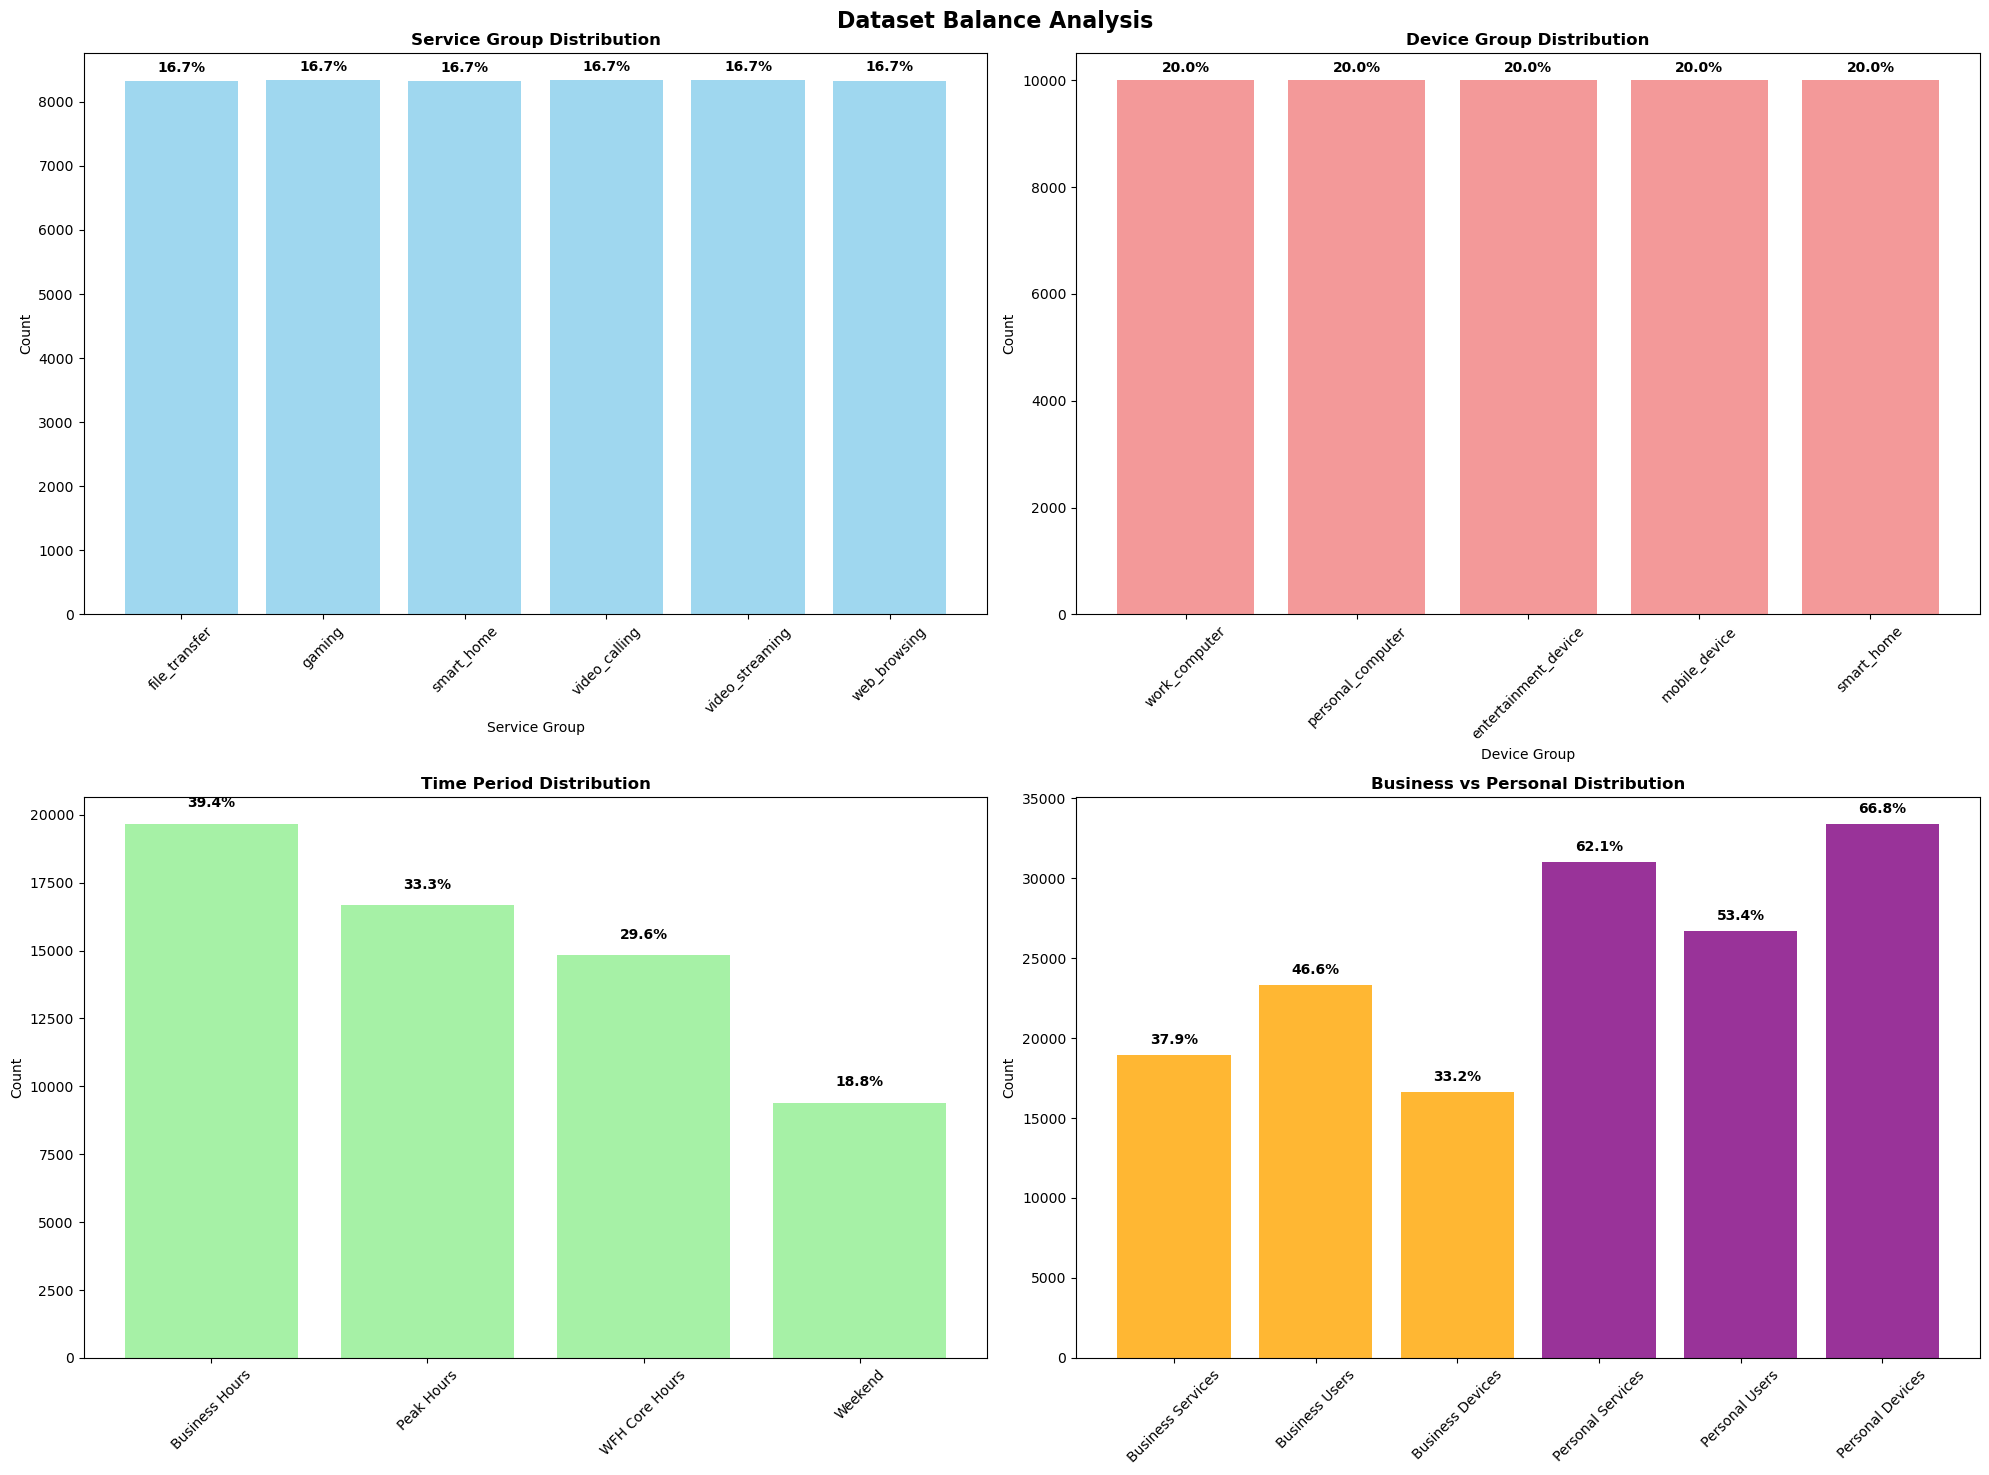


 TARGET VARIABLE ANALYSIS


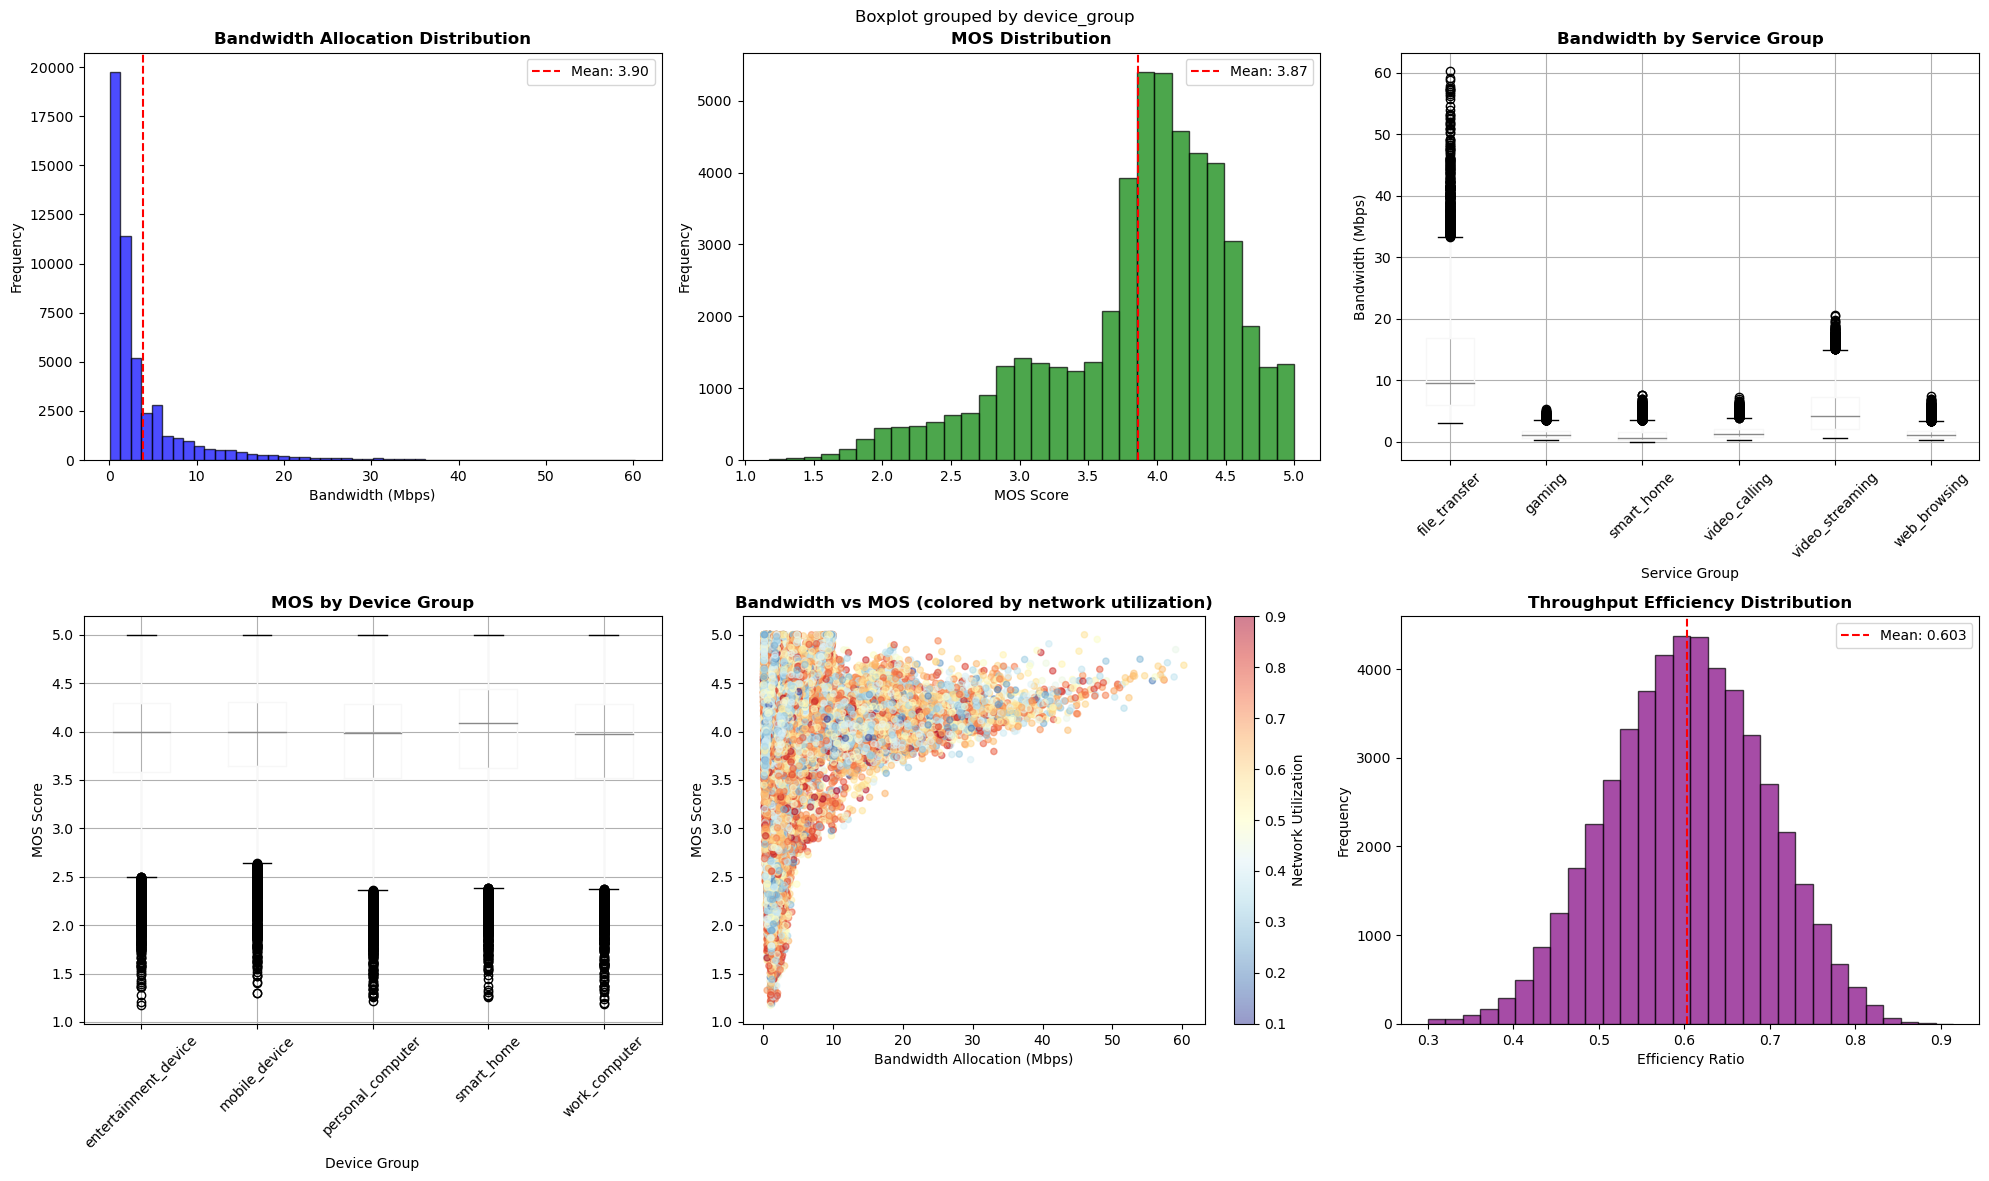

 BANDWIDTH ALLOCATION STATS:
count    50000.000000
mean         3.900475
std          5.861160
min          0.060000
25%          0.812499
50%          1.746421
75%          4.188538
max         60.239537
Name: optimal_bandwidth_allocation, dtype: float64

 MOS STATS:
count    50000.000000
mean         3.865526
std          0.683636
min          1.172043
25%          3.578454
50%          4.000058
75%          4.338692
max          5.000000
Name: MOS, dtype: float64

 THROUGHPUT EFFICIENCY STATS:
count    50000.000000
mean         0.602986
std          0.090798
min          0.300000
25%          0.540527
50%          0.604051
75%          0.666895
max          0.914198
Name: throughput_efficiency, dtype: float64

 NETWORK PERFORMANCE ANALYSIS


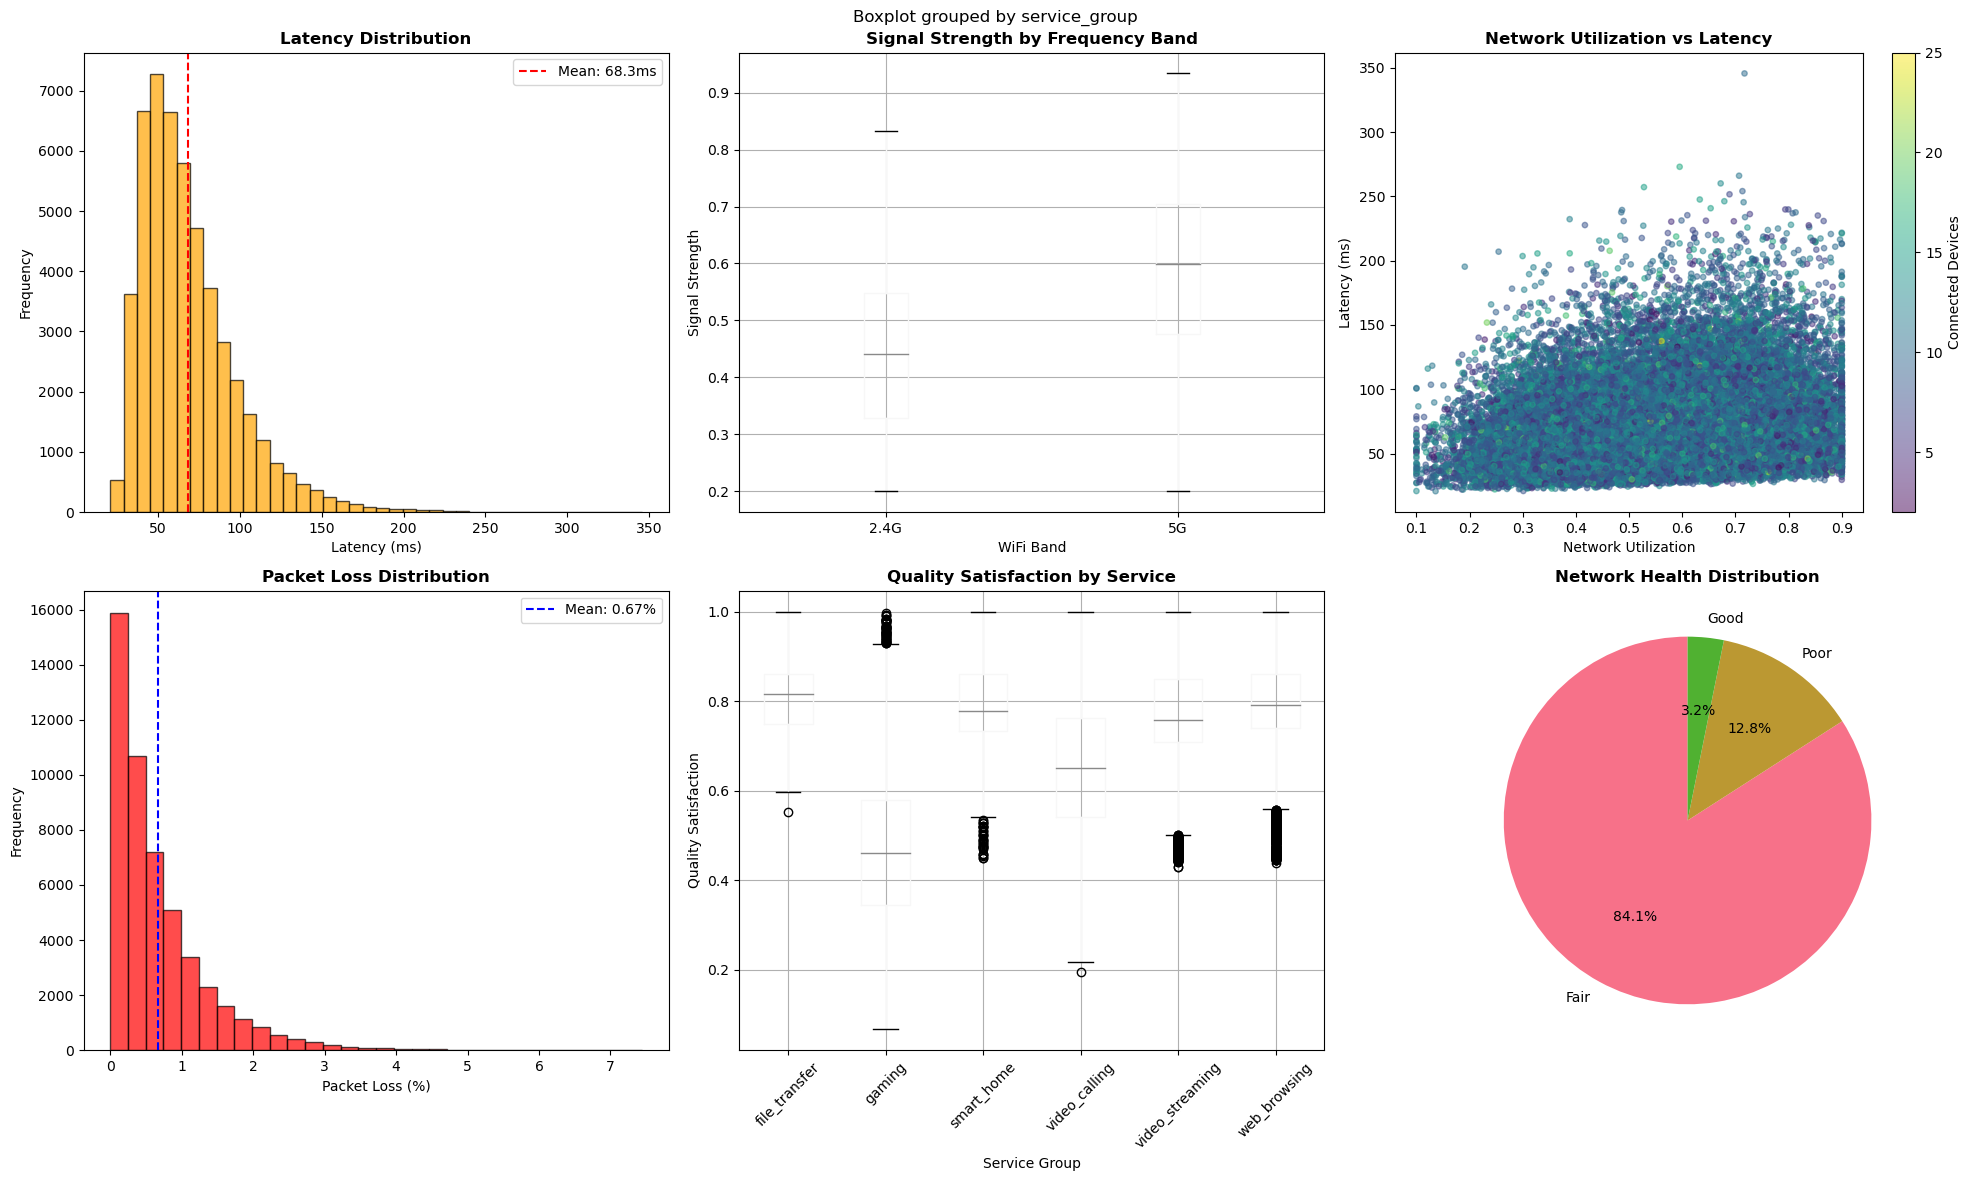

 NETWORK PERFORMANCE STATS:
Average Latency: 68.3 ms
Average Jitter: 8.6 ms
Average Packet Loss: 0.67%
Average Signal Strength: 0.512
Average Quality Satisfaction: 0.716

 TEMPORAL PATTERN ANALYSIS


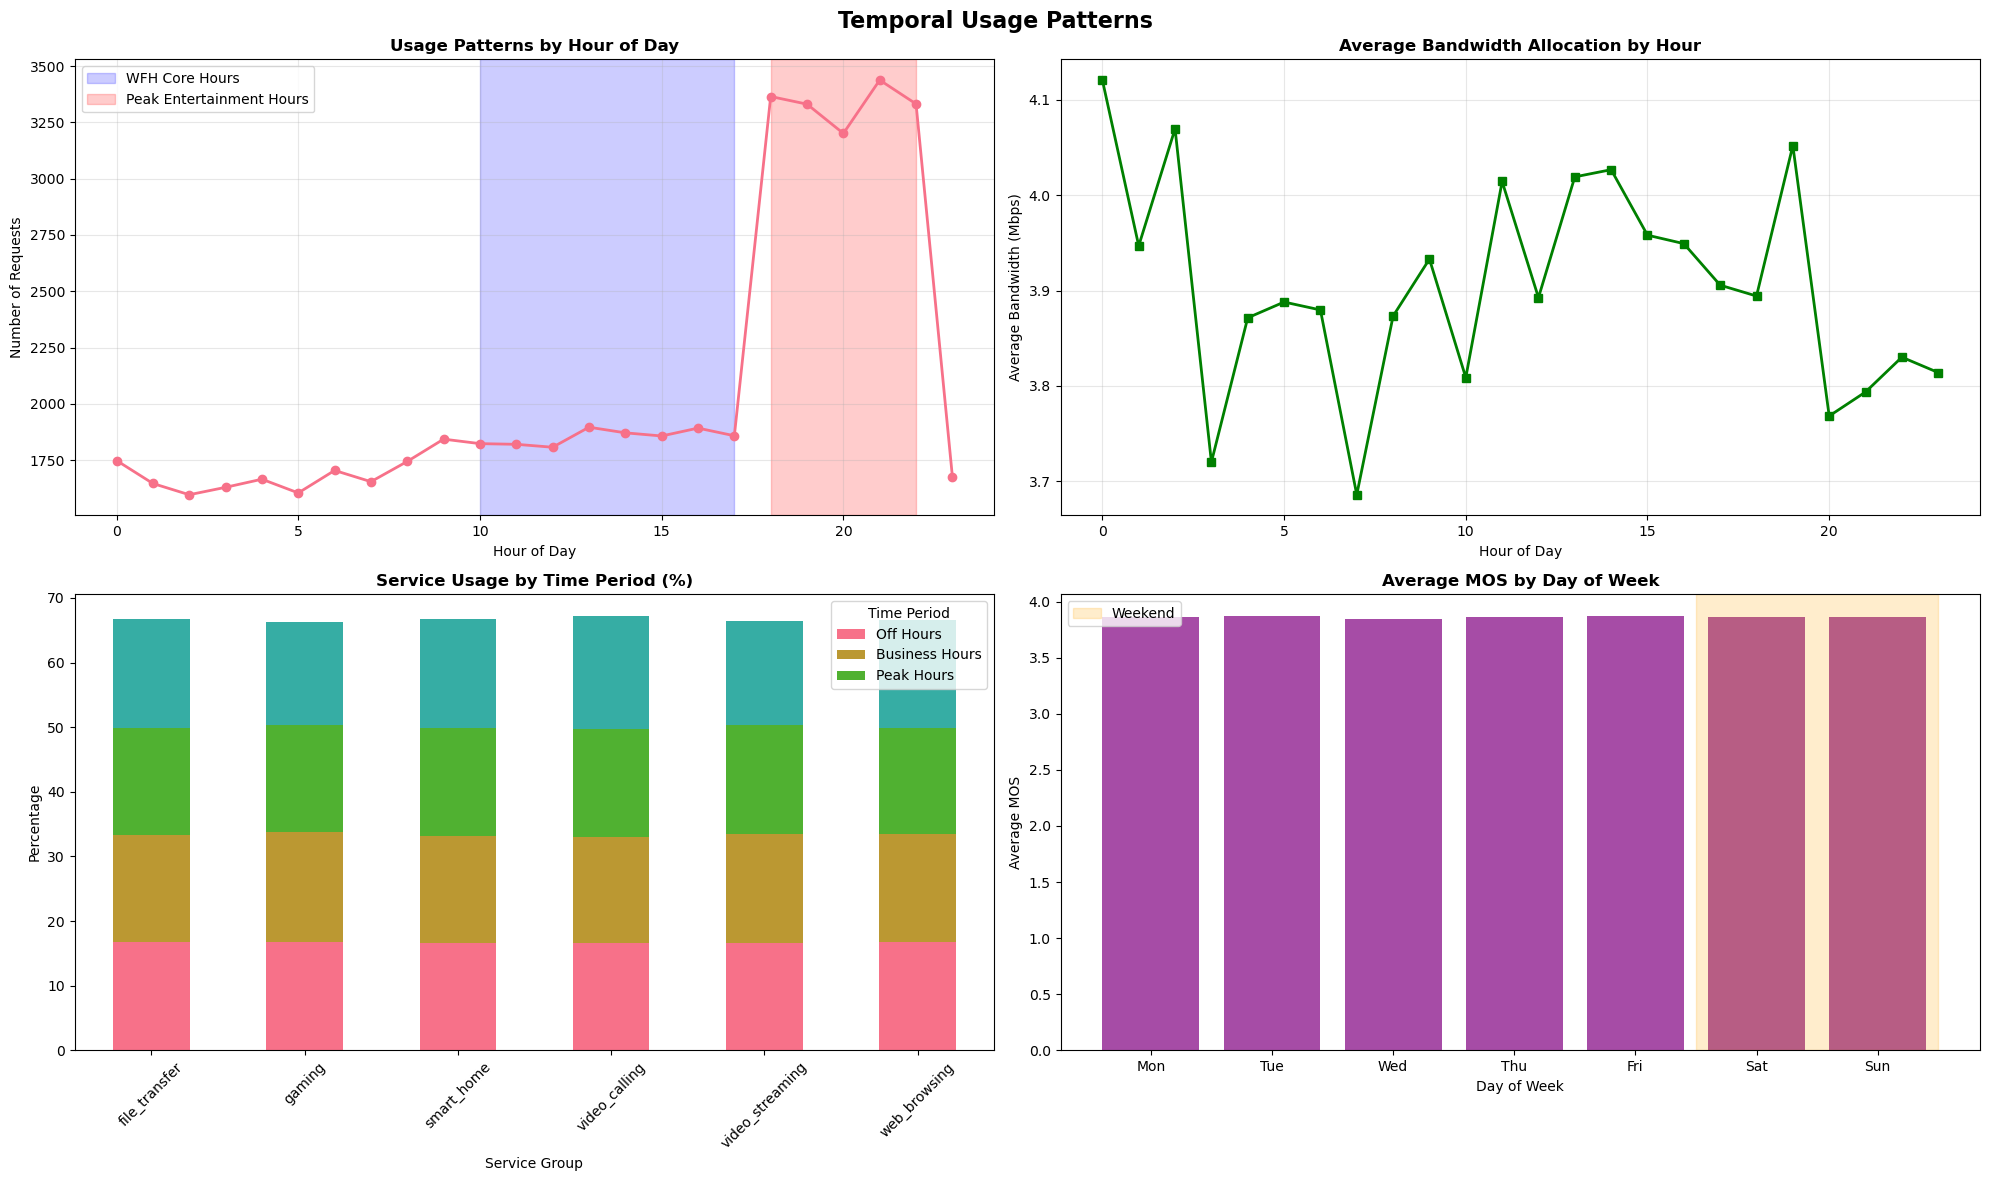

 TEMPORAL INSIGHTS:
Peak usage hour: 21:00 (3,438 requests)
Lowest usage hour: 2:00 (1,596 requests)
Average business hours MOS: 3.86
Average weekend MOS: 3.86

 DEVICE-SERVICE PATTERN ANALYSIS


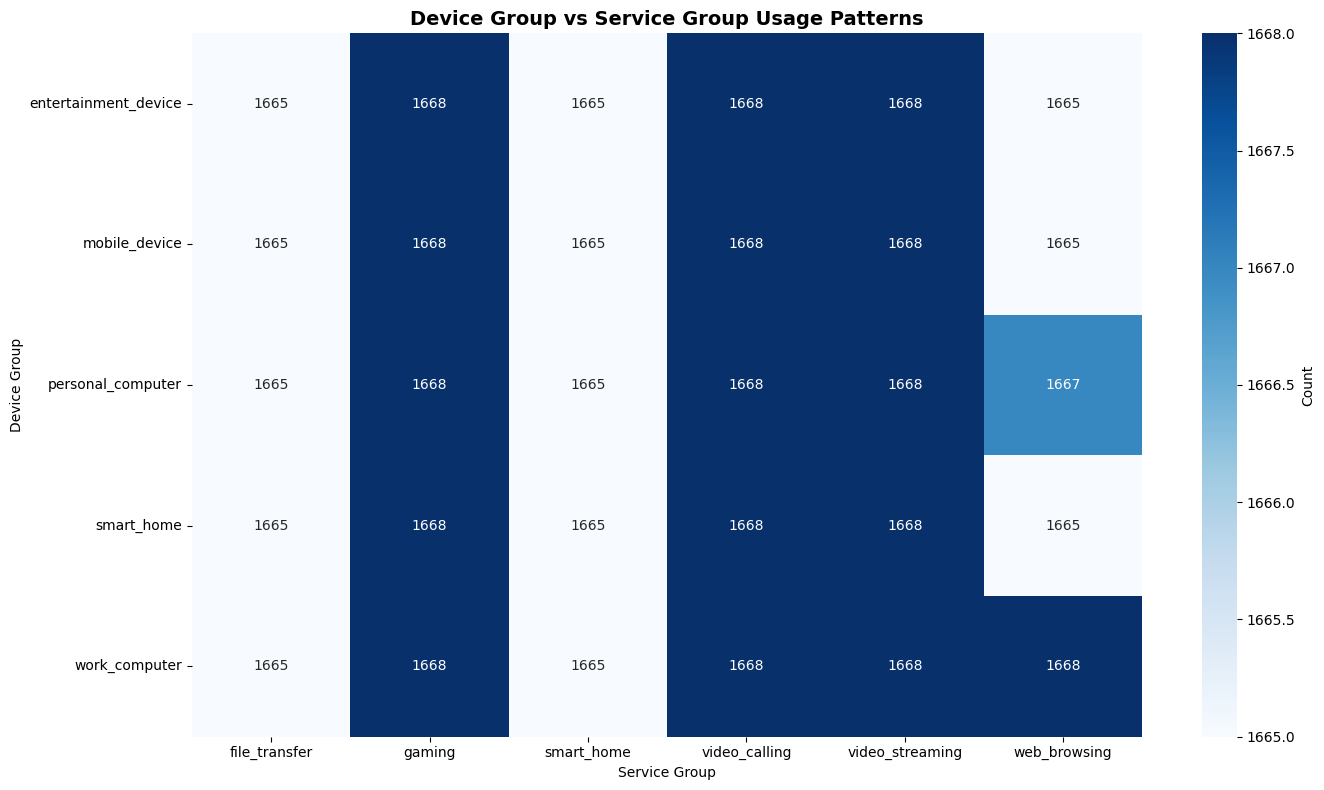

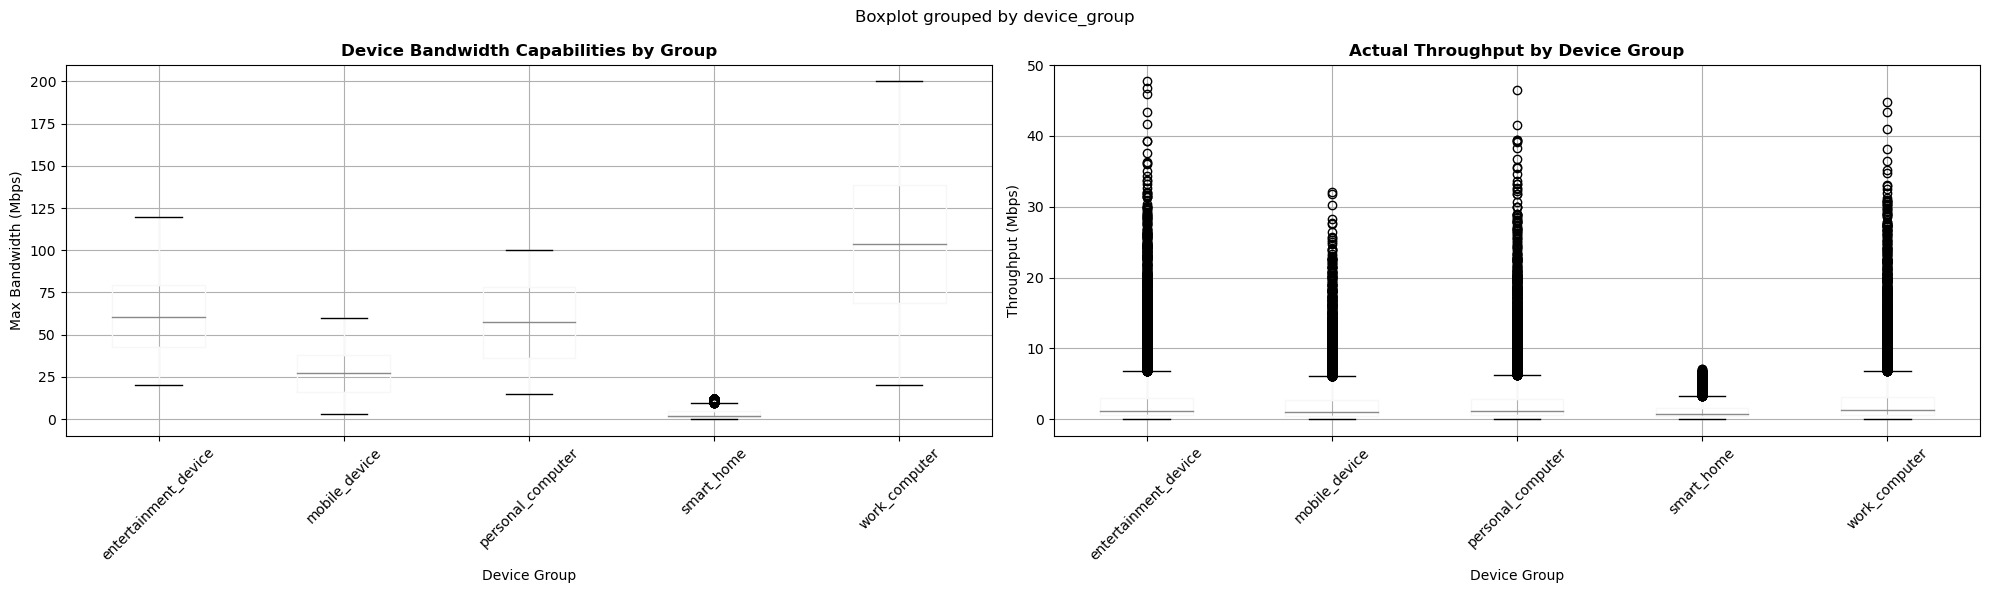

 DEVICE-SERVICE INSIGHTS:

 TOP 10 DEVICE-SERVICE COMBINATIONS:
   personal_computer + video_calling: 1,668 requests
   personal_computer + gaming: 1,668 requests
   work_computer + video_streaming: 1,668 requests
   work_computer + video_calling: 1,668 requests
   work_computer + gaming: 1,668 requests
   smart_home + video_streaming: 1,668 requests
   smart_home + video_calling: 1,668 requests
   smart_home + gaming: 1,668 requests
   personal_computer + video_streaming: 1,668 requests
   entertainment_device + gaming: 1,668 requests

 DEVICE EFFICIENCY:
   smart_home: 0.604 (60.4% efficiency)
   entertainment_device: 0.603 (60.3% efficiency)
   personal_computer: 0.603 (60.3% efficiency)
   work_computer: 0.603 (60.3% efficiency)
   mobile_device: 0.600 (60.0% efficiency)

 CORRELATION ANALYSIS


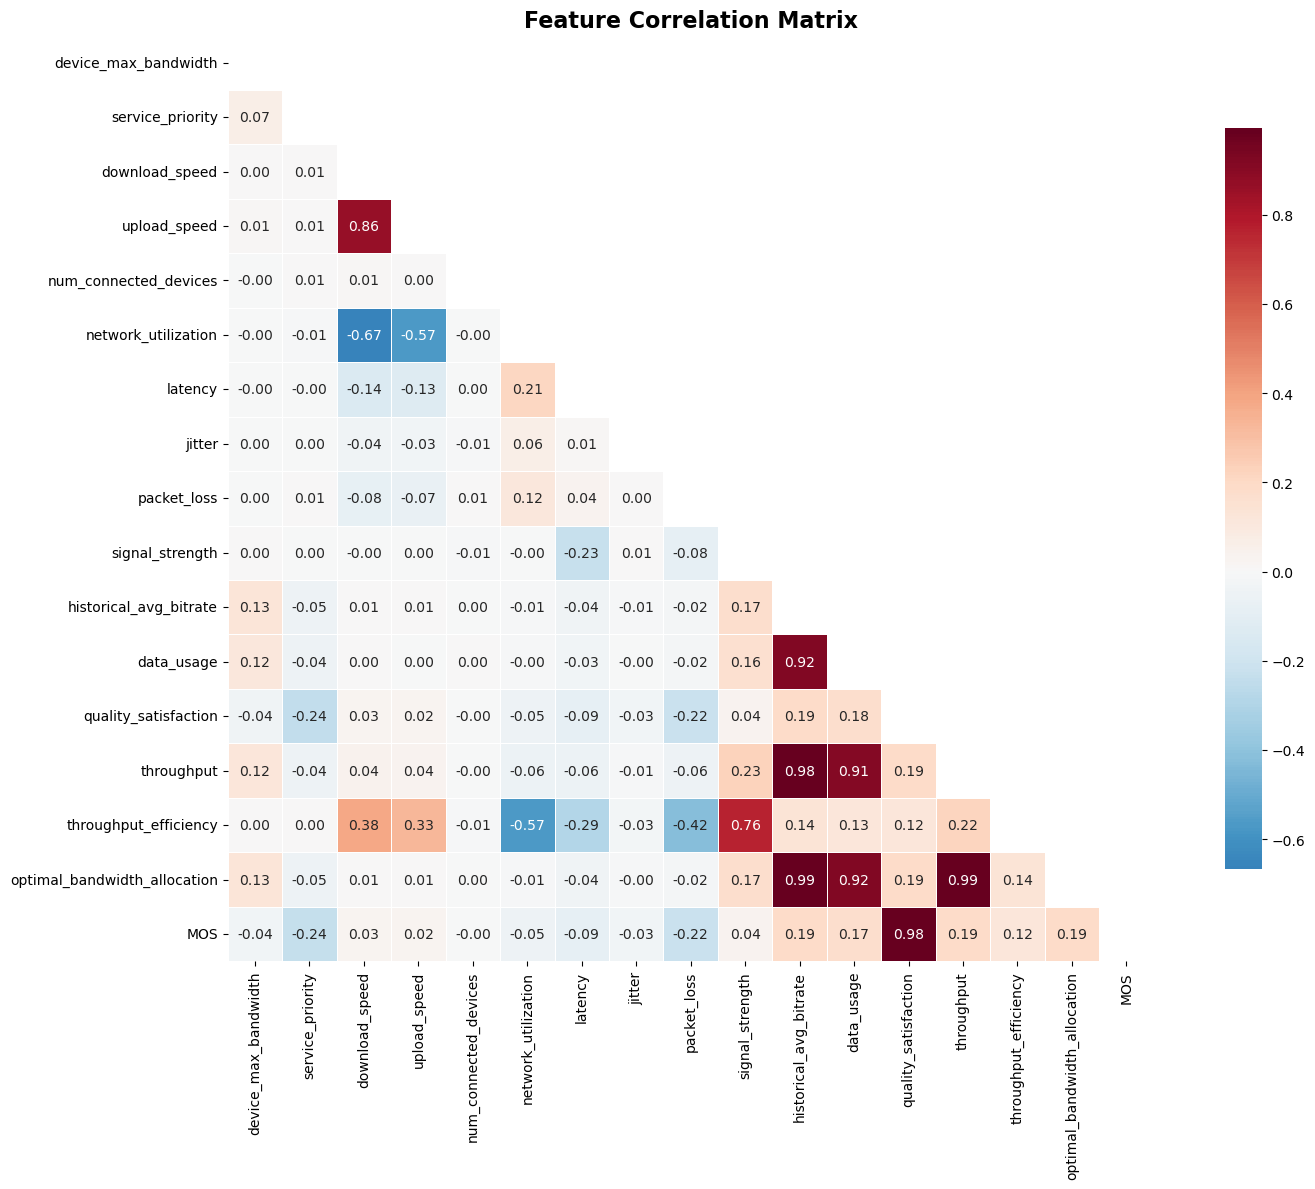

 STRONGEST CORRELATIONS WITH TARGETS:

 BANDWIDTH ALLOCATION CORRELATIONS:
   historical_avg_bitrate: 0.995
   throughput: 0.988
   data_usage: 0.922
   quality_satisfaction: 0.191
   MOS: 0.188
   signal_strength: 0.173
   throughput_efficiency: 0.138
   device_max_bandwidth: 0.128
   service_priority: 0.047

 MOS CORRELATIONS:
   quality_satisfaction: 0.985
   service_priority: 0.238
   packet_loss: 0.219
   throughput: 0.190
   optimal_bandwidth_allocation: 0.188
   historical_avg_bitrate: 0.187
   data_usage: 0.174
   throughput_efficiency: 0.122
   latency: 0.087

 COMPREHENSIVE DATASET SUMMARY
 DATASET OVERVIEW:
   Total Records: 50,000
   Features: 33
   Time Span: 30 days
   Unique Devices: 12
   Unique Services: 21

 TARGET VARIABLE SUMMARY:
   Avg Bandwidth Allocation: 3.90 Mbps
   Bandwidth Range: 0.1 - 60.2 Mbps
   Avg MOS Score: 3.87
   MOS Range: 1.2 - 5.0

 NETWORK QUALITY SUMMARY:
   Avg Latency: 68.3 ms
   Avg Packet Loss: 0.67%
   Avg Signal Strength: 0.512
   Avg Thr

In [71]:

def run_complete_eda(filename='perfectly_balanced_wifi_dataset.csv'):
    """Run complete EDA analysis"""
    print(" STARTING COMPREHENSIVE EDA ANALYSIS")
    print("=" * 80)
    
    # Load and basic info
    df = load_and_basic_info(filename)
    
    # Run all analyses
    analyze_balance_distribution(df)
    analyze_target_variables(df)
    analyze_network_performance(df)
    analyze_time_patterns(df)
    analyze_device_service_patterns(df)
    correlation_analysis(df)
    generate_summary_report(df)
    
    print("\n" + "=" * 80)
    print(" EDA ANALYSIS COMPLETE!")
    print("=" * 80)
    
    return df

# Run the complete EDA
if __name__ == "__main__":
    df = run_complete_eda('perfectly_balanced_wifi_dataset.csv')
    
    print("\n KEY INSIGHTS FOR ML MODEL:")
    print("1. Dataset is perfectly balanced across all dimensions")
    print("2. Clear patterns in temporal usage (work vs entertainment hours)")
    print("3. Device capabilities directly impact bandwidth allocation")
    print("4. Network quality metrics strongly correlate with MOS")
    print("5. Business context significantly affects service priorities")
